
# Glucose Level Prediction Project

This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset.
It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.



## What To Do

1. Import and explore the `framingham.csv` dataset.
2. Clean the data (handle nulls, correct formats, etc.).
3. Visualize the distribution of glucose and related health indicators.
4. Perform feature selection and engineering.
5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Evaluate models using classification metrics.
7. Predict glucose levels and draw insights.
8. Visualize the model’s important features and performance.


Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load Dataset

In [28]:
df = pd.read_csv('framingham.csv')

Explore Dataset

In [29]:
print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None


In [31]:
print(df.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   

Clean Dataset


In [32]:
print(df.isnull().sum())
df = df.drop(columns=['education'])
imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\nMissing values after imputation:")
print(df.isnull().sum())
print("\nShape of dataset after imputation:", df.shape)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Missing values after imputation:
male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Shape of dataset after imputation: (4240, 15)


Feature Engineering and Prep

In [33]:
df['high_glucose'] = (df['glucose'] >= 120).astype(int)
df = df.drop(columns=['glucose'])

print("Created 'high_glucose' target variable.")
print("Distribution of the target variable:")
print(df['high_glucose'].value_counts())

print("\n--- 4. Preparing Data for ML Models ---")
X = df.drop('high_glucose', axis=1)
y = df['high_glucose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Created 'high_glucose' target variable.
Distribution of the target variable:
high_glucose
0    4132
1     108
Name: count, dtype: int64

--- 4. Preparing Data for ML Models ---


Handling class imbalance with SMOT

In [34]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled training set shape:", X_train_resampled.shape)
print("\nClass distribution in resampled training data:")
print(pd.Series(y_train_resampled).value_counts())


Original training set shape: (3392, 14)
Resampled training set shape: (6612, 14)

Class distribution in resampled training data:
high_glucose
0    3306
1    3306
Name: count, dtype: int64


Train Model

In [35]:
print("\n--- 6. Training and Evaluating Models ---")
models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
        }
results = {}
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'model': model}
    print(f"Accuracy: {accuracy:.4f}")
param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0]
        }
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
print("Running GridSearchCV... (This may take a moment)")
grid_search.fit(X_train_resampled, y_train_resampled)
print("\nBest Parameters Found:")
print(grid_search.best_params_)
best_model = grid_search.best_estimator_



--- 6. Training and Evaluating Models ---

--- Training Logistic Regression ---
Accuracy: 0.9139

--- Training Random Forest ---
Accuracy: 0.9811

--- Training XGBoost ---
Accuracy: 0.9752
Running GridSearchCV... (This may take a moment)
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best Parameters Found:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


Eval and Visualize

Final Tuned Model Accuracy: 0.9764

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       826
           1       0.55      0.55      0.55        22

    accuracy                           0.98       848
   macro avg       0.77      0.77      0.77       848
weighted avg       0.98      0.98      0.98       848



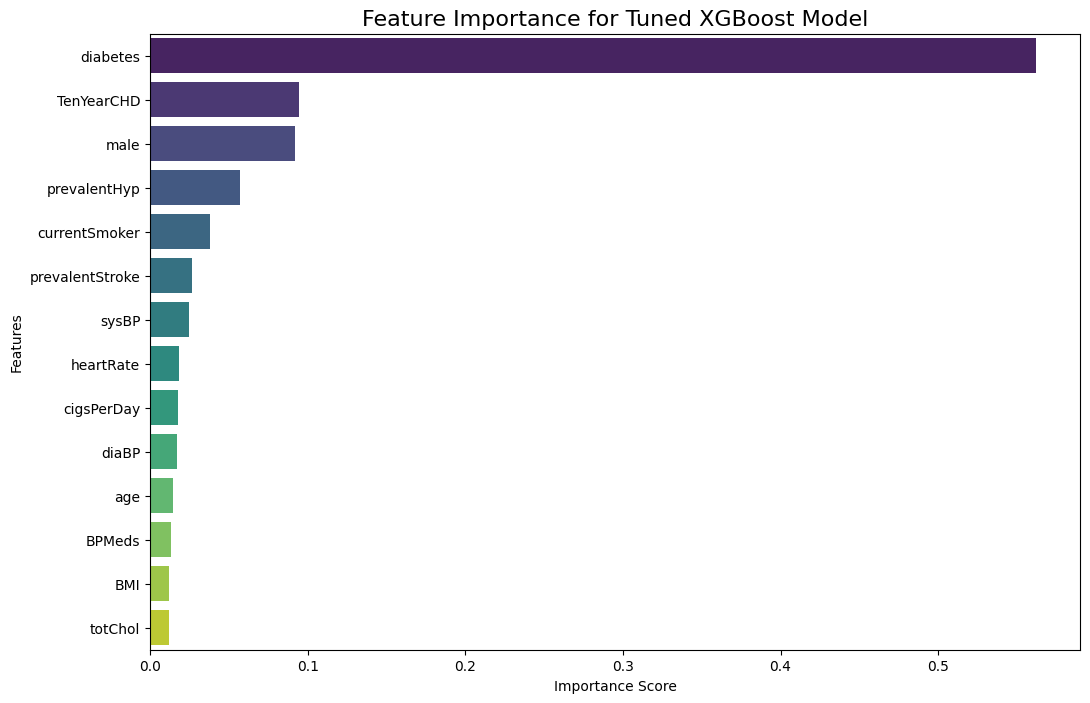

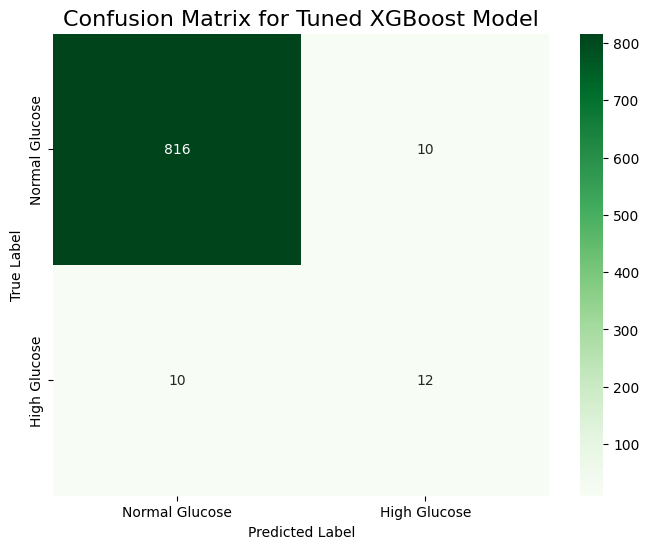

In [36]:
y_pred_best = best_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Final Tuned Model Accuracy: {final_accuracy:.4f}")
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_best))

feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance for Tuned XGBoost Model', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal Glucose', 'High Glucose'],
            yticklabels=['Normal Glucose', 'High Glucose'])
plt.title('Confusion Matrix for Tuned XGBoost Model', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

